# Camera definition

This notebook demonstrates how to manipulate the CameraRegistry.

This is defined by the registry module and provided methods for adding new cameras or getting the existing ones.

In [1]:
# this is to avoid installing the package for demonstration
# you can import it directly when installed
import sys
sys.path.append("../../") # The notebooks are located in a folder next to the library modules
import importlib

import pypho
from pypho.design import camera, graphics

In [2]:
# to make the figures colorblind friendly, use pyplot default settings for this
import matplotlib.pyplot as plt
plt.style.use('tableau-colorblind10')

In [8]:
# if necessary, when developping, you can reload this by uncommenting this line
_ = importlib.reload(pypho)
_ = importlib.reload(camera)
_ = importlib.reload(graphics)

## Visualising the registry

In [187]:
camera.CameraRegistry.camera_base.head()

,name,sensor_width,sensor_height,nb_pixel_width,nb_pixel_height,pixel_pitch,nb_pixel,MPix
uid,,,,,,,,
A7RIV,Sony Alpha 7RIV,35.7,23.8,9600,6376,0.003719,61209600,61.2


In [188]:
camera.CameraRegistry.lens_base.head()

,name,focal_min,focal_max,focal_fixed,min_focus_distance
uid,,,,,
FE35,Sony FE 35 mm f/1.4 Zeiss Distagon T*,35,35,True,0.3


## Adding new cameras and lenses

In [189]:
camera.CameraRegistry.register_camera(
    uid="test", name= "Test Camera",
    sensor_width= 35.7, sensor_height= 23.8,
    nb_pixel_width= 9600, nb_pixel_height= 6376
)

camera.CameraRegistry.register_lens(
    uid= "test",
    name= "test lens",
    focal_min= 35,
    focal_max= 100,
    min_focus_distance= 0.3 
)

In [190]:
camera.CameraRegistry.camera_base.head()

,name,sensor_width,sensor_height,nb_pixel_width,nb_pixel_height,pixel_pitch,nb_pixel,MPix
uid,,,,,,,,
A7RIV,Sony Alpha 7RIV,35.7,23.8,9600,6376,0.003719,61209600,61.2
test,Test Camera,35.7,23.8,9600,6376,0.003719,61209600,61.2


In [191]:
camera.CameraRegistry.lens_base.head()

,name,focal_min,focal_max,focal_fixed,min_focus_distance
uid,,,,,
FE35,Sony FE 35 mm f/1.4 Zeiss Distagon T*,35,35,True,0.3
test,test lens,35,100,False,0.3


## Creating a Camera

### From the registry

In [192]:
a7riv = camera.CameraRegistry.get_camera("A7RIV","FE35")
print(a7riv.name)

A7RIV


### Directly by its properties

In [193]:
camera.Camera(sensor_width= 35.7, sensor_height=23.8, nb_pixel_width= 9600, nb_pixel_height= 6376,
       focal= 90, min_focus_distance= 0.3)

In [194]:
# or taking a camera from the registry and lens defined by properties
camera.Camera(cam_id= "A7RIV",
       focal= 90, min_focus_distance= 0.3)

## Plotting Camera definition

### With a single camera

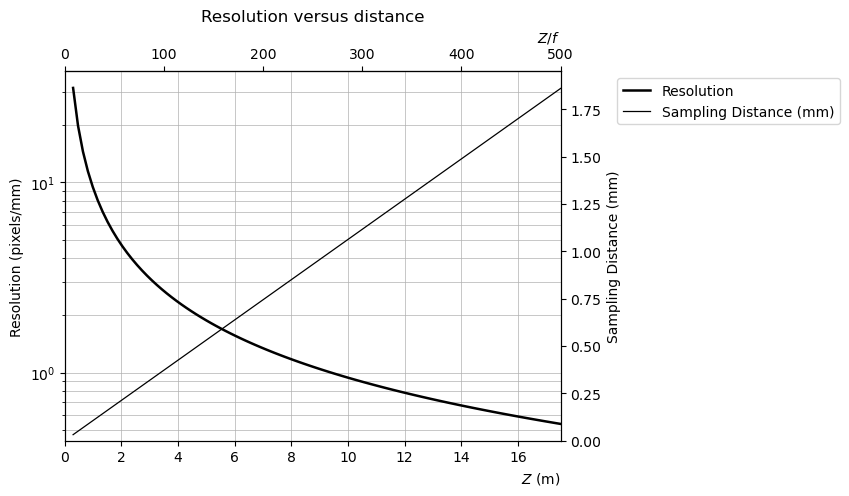

In [5]:
cam = camera.get_default_camera()

# creating a graph object
graph = graphics.ResolutionGraph(cam)
graph.plot()

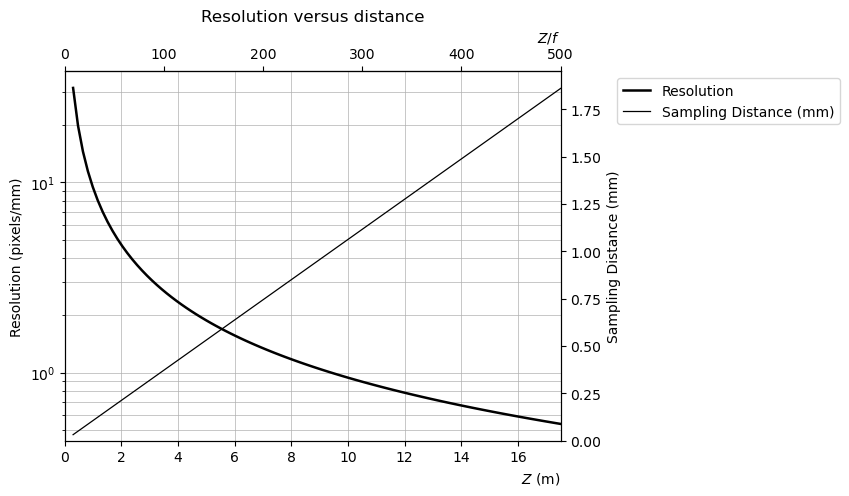

In [6]:
# or directly from the helper function 
graphics.plot_resolution_graph(cam)

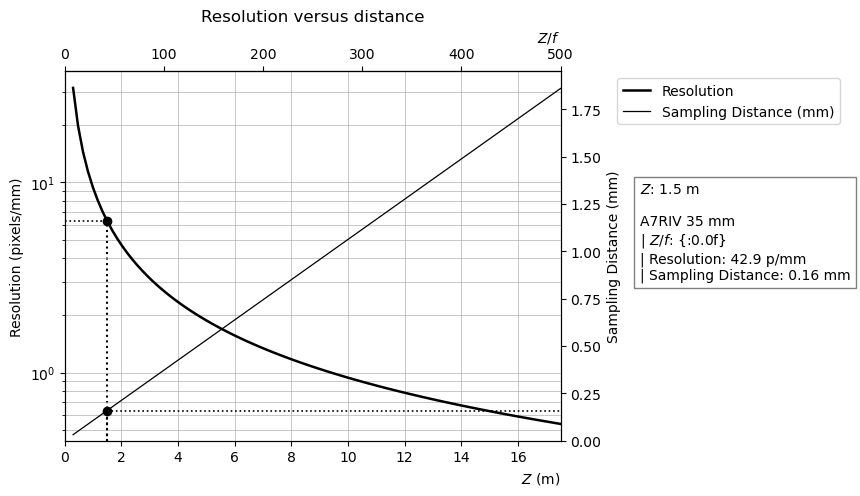

In [11]:
# with information about a reference distance
graphics.plot_resolution_graph(cam, z_ref= 1.5)

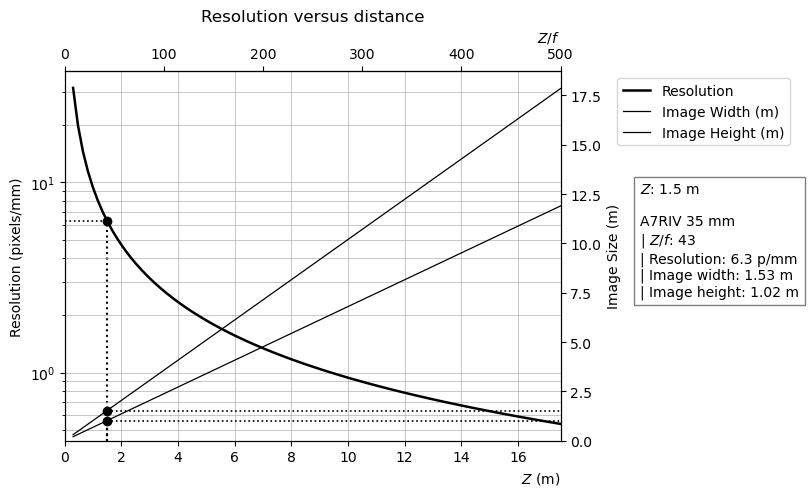

In [44]:
# with information about a reference distance
graphics.plot_resolution_graph(cam, z_ref= 1.5, second_yaxis= "ImageSize")

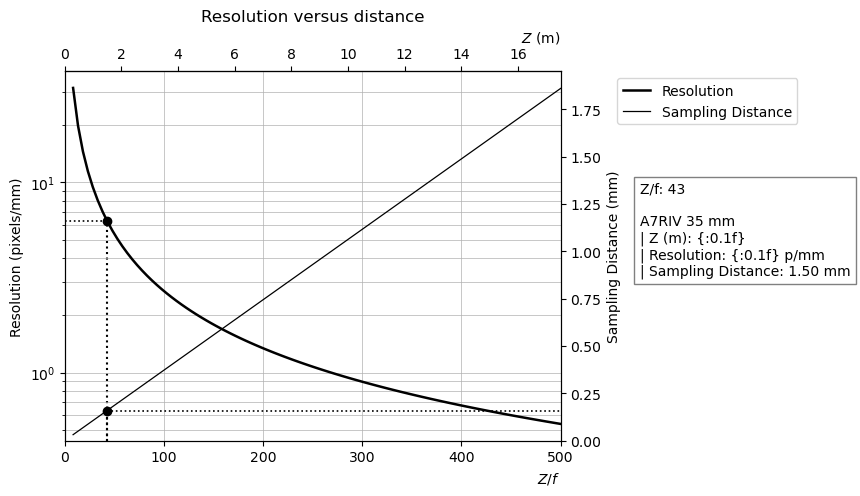

In [27]:
# using Z/F as x axis
graphics.plot_resolution_graph(cam, z_ref= 1.5, use_z_f_ratio_on_x_axis= True)

### With additional cameras for comparison

In [18]:
_ = importlib.reload(graphics)

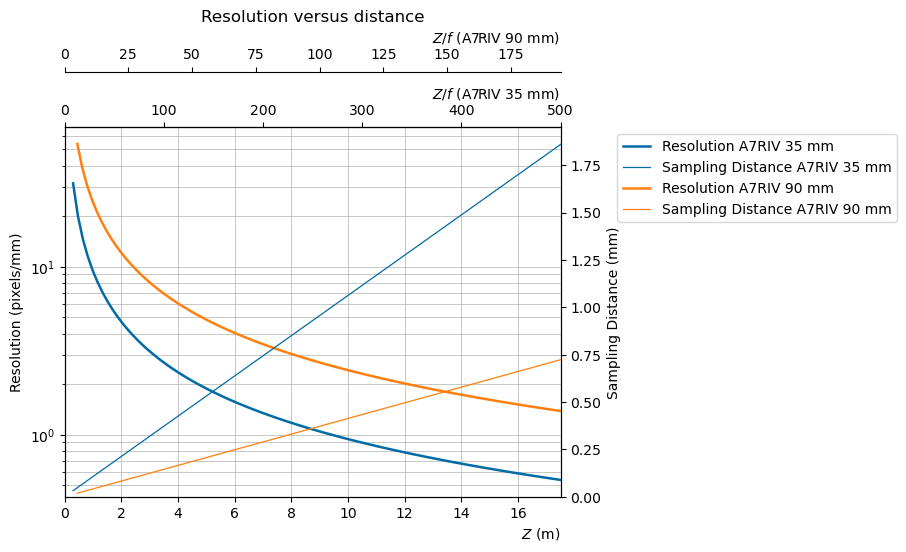

In [15]:
cam2 = camera.Camera(cam_id= "A7RIV", focal= 90, min_focus_distance= 0.45)
graphics.plot_resolution_graph(cam, secondary_cam=[cam2])

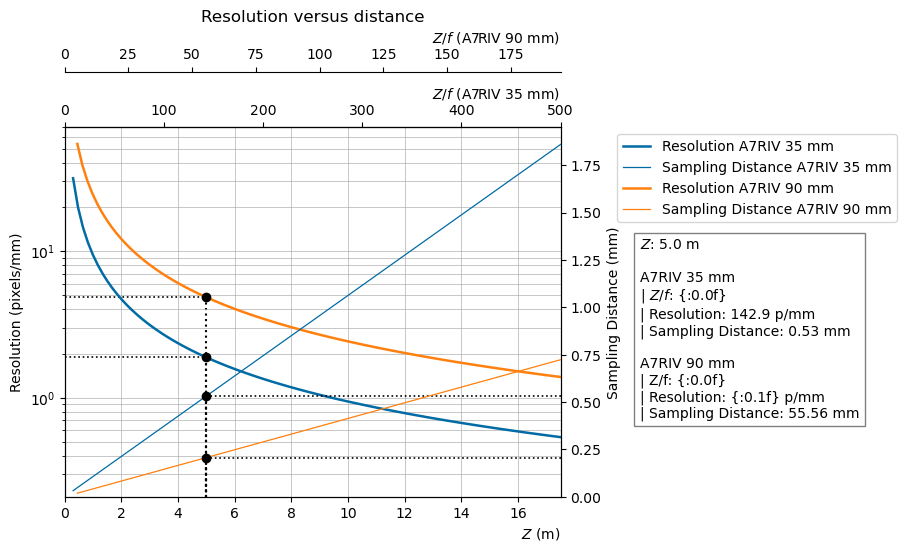

In [16]:
# with reference distance
graphics.plot_resolution_graph(cam, secondary_cam=[cam2], z_ref = 5)

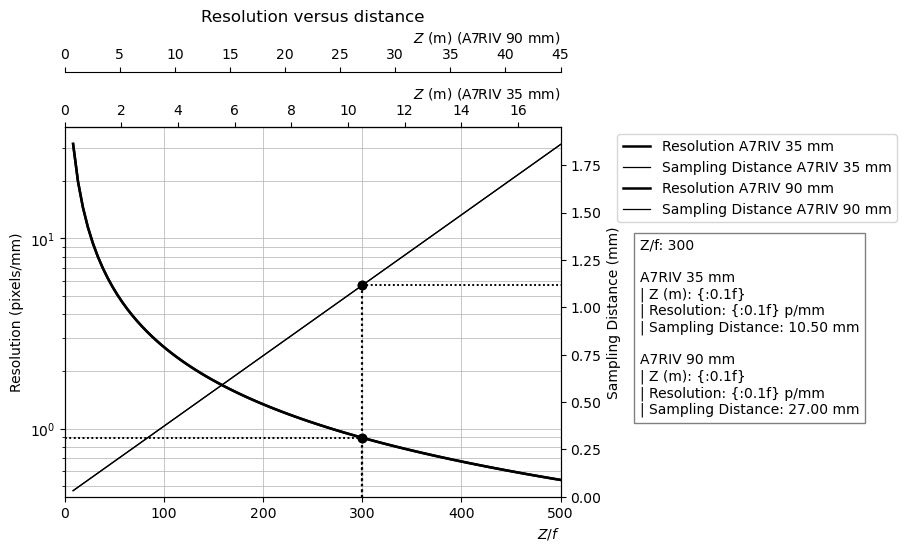

In [17]:
# Z/f in x axis
graphics.plot_resolution_graph(cam, secondary_cam=[cam2], zf_ref = 300, use_z_f_ratio_on_x_axis= True)

In [242]:
# if necessary, when developping, you can reload this by uncommenting this line
_ = importlib.reload(pypho)
_ = importlib.reload(camera)
_ = importlib.reload(graphics)

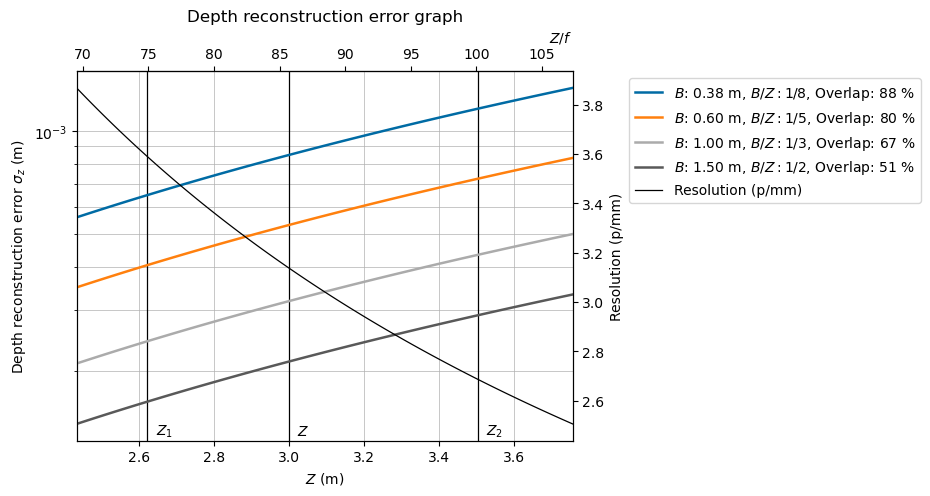

In [ ]:
cam = camera.get_default_camera()
cam.update_focus(3)
cam.update_aperture(8)
graph = graphics.DepthPrecisionGraph(cam,
                                     B_Z_ratio= [1/8,1/5,1/3, 1/2],
                                     z_padding_ratio= 0.5,
                                     second_yaxis= "Resolution",
                                     use_log= True,
                                     y_text = 0.00013
                                     )
graph.plot()

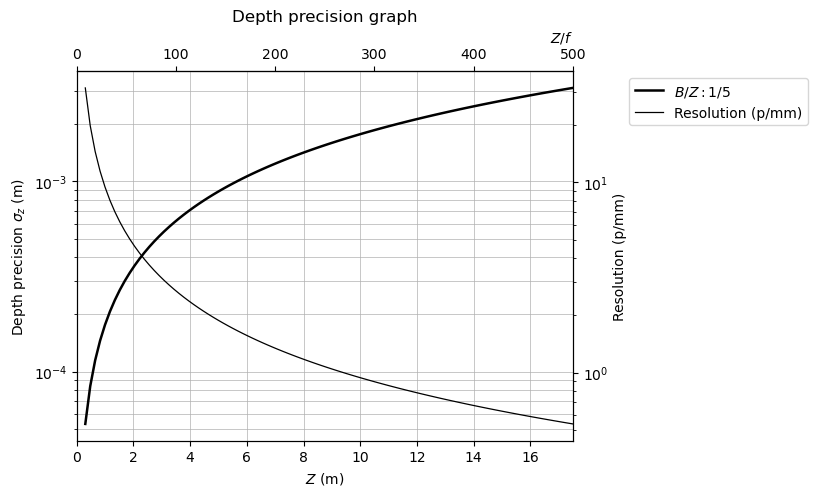

In [238]:
graph = graphics.DepthPrecisionGraph(cam= camera.get_default_camera())
graph.plot()

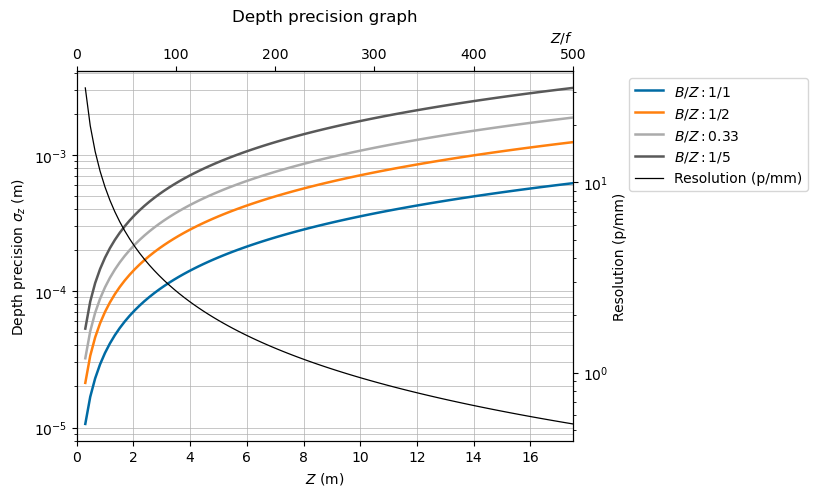

In [239]:
graph = graphics.DepthPrecisionGraph(
    cam= camera.get_default_camera(),
    B_Z_ratio= [1, 1/2, 0.33, 1/5]
)
graph.plot()

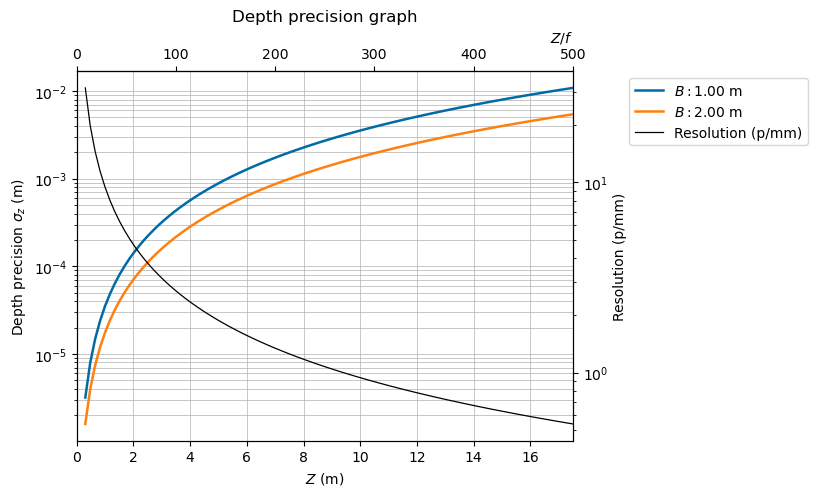

In [240]:
graph = graphics.DepthPrecisionGraph(
    cam= camera.get_default_camera(),
    B= [1,2],
    use_log= True
)
graph.plot()

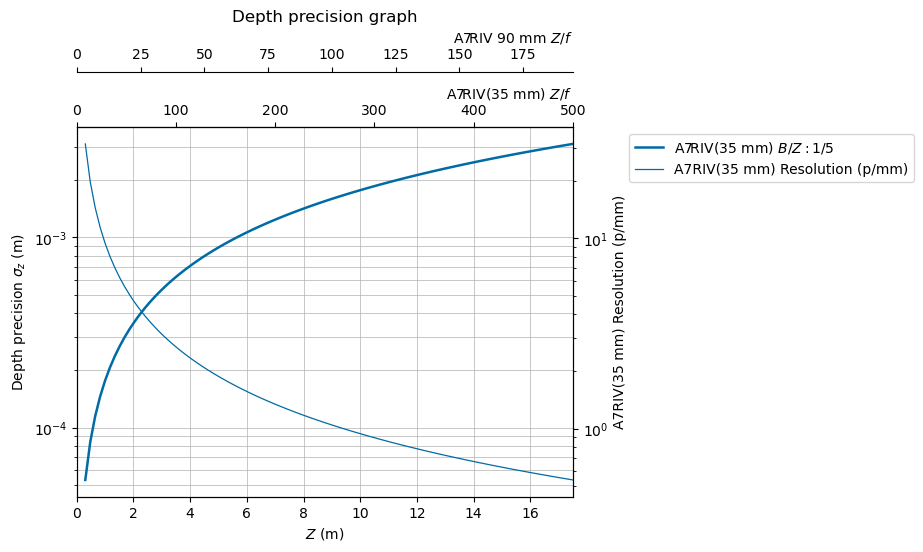

In [243]:

cam2 = cam.copy()
cam2.setup_lens(focal=90, force=True)

graph = graphics.DepthPrecisionGraph(
    cam= camera.get_default_camera(),
    secondary_cam = [cam2]
)
graph.plot()


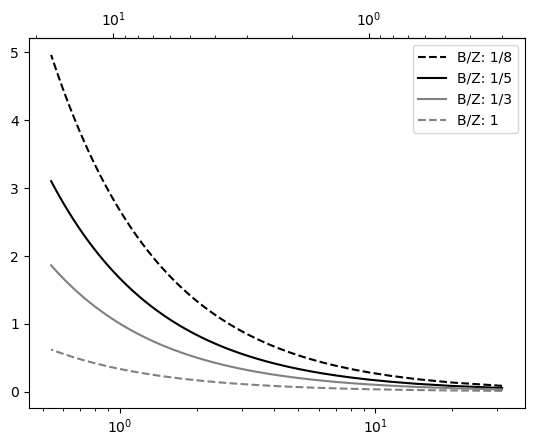

In [104]:
cam = camera.get_default_camera()
z = np.linspace(cam.min_focus_distance, 500 *cam.focal/1000, 100)
res = cam._compute_resolution(z)

sig_z = cam._compute_depth_accuracy_vs_resolution(res, 1/8)
plt.plot(res, sig_z, "k--", label="B/Z: 1/8")

sig_z = cam._compute_depth_accuracy_vs_resolution(res, 1/5)
plt.plot(res, sig_z, "k-", label="B/Z: 1/5")

sig_z = cam._compute_depth_accuracy_vs_resolution(res, 1/3)
plt.plot(res, sig_z, "-", color="gray", label="B/Z: 1/3")

sig_z = cam._compute_depth_accuracy_vs_resolution(res, 1)
plt.plot(res, sig_z, "--", color="gray", label="B/Z: 1")
plt.legend()

plt.gca().secondary_xaxis("top", functions = (cam._compute_z_from_resolution, cam._compute_resolution))

plt.gca().set_xscale("log")

In [102]:
90/cam.pixel_size/1000

np.float64(24.201680672268907)

## Getting Camera Informations

In [8]:
print(a7riv)

Camera settings:
  shots: []
  target_object: None
  orientation: landscape
  location: [0. 0. 0.]
  yaw: 0
  pitch: 0
  roll: 0
  rotation: <scipy.spatial.transform._rotation.Rotation object at 0x000002AEB3DCDA70>
  dir_vector: [1. 0. 0.]
  w_vector: [0. 1. 0.]
  h_vector: [0. 0. 1.]
  confusion_method: bouillot
  cam_id: A7RIV
  camera_characteristics: name               Sony Alpha 7RIV
sensor_width                  35.7
sensor_height                 23.8
nb_pixel_width                9600
nb_pixel_height               6376
pixel_size                0.003719
nb_pixel                  61209600
MPix                          61.2
Name: A7RIV, dtype: object
  camera_type: Sony Alpha 7RIV
  name: A7RIV
  sensor_width: 35.7 mm
  sensor_height: 23.8 mm
  pixel_size: 0.0037187500000000003 mm
  confusion_circle_diameter: 0.0074375000000000005 mm
  lens_id: FE35
  N: 2.8
  lens_characteristics: name                  Sony FE 35 mm f/1.4 Zeiss Distagon T*
focal_min                               